In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torchvision import transforms

In [3]:
import numpy as np

In [4]:
from PIL import Image

In [5]:
from scipy.io import loadmat
import h5py

# Convert matlab data to jpg image

In [6]:
data_folder = "/home/user170/shared-data/Personal_Dev/Machine-Learning/Data/Depth/NYU-Depth-Dataset-V2/"

In [7]:
with h5py.File(data_folder+'nyu_depth_v2_labeled.mat', 'r') as mat_data:
    data_len = len(mat_data['images'])
    
    for idx in range(data_len):
        rgb_img = Image.fromarray(np.moveaxis(mat_data['images'][idx], [0, 1], [-1, -2]))
        depth_img = Image.fromarray(np.moveaxis(mat_data['depths'][idx], [0], [-1]), mode='F')
        
        rgb_img.save(data_folder+"Images/RGB/{0}.jpg".format(idx))
        depth_img.save(data_folder+"Images/Depth/{0}.tiff".format(idx), "TIFF")

In [23]:
rgb_img = Image.open(data_folder+"Images/RGB/0.jpg")
d_img = Image.open(data_folder+"Images/Depth-tiff/0.tiff")

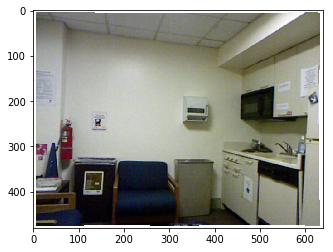

In [21]:
plt.imshow(rgb_img)

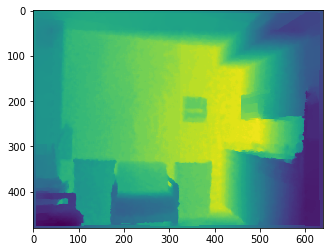

In [24]:
plt.imshow(d_img)

In [ ]:
class LoadData(Dataset):
    def __init__(self, mat_file, root_dir, transform=None):
        """
        Args:
            mat_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.mat_data = h5py.File(root_dir+mat_file, 'r')
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        self.dataset_len = len(self.mat_data['images'])
        return self.len
    
    def __getitem__(self, train_test_ratio = 0.3):
        # shuffle indice
        rnd_idx = np.random.shuffle(np.arrange(self.dataset_len))
        # set the barrier between train and validation dataset
        split_thresh = self.dataset_len*int(1-0.3)
        
        train_idx = rnd_idx[:split_thresh]
        test_idx = rand_idx[split_thresh:]
        
        image = self.mat_data['images'][train_idx]
        
        return image

In [ ]:
dataloader = LoadData(
    "nyu_depth_v2_labeled.mat", 
    "/home/user170/shared-data/Personal_Dev/Machine-Learning/Data/Depth/NYU-Depth-Dataset-V2/")

In [ ]:
dataloader.__getitem__()

In [ ]:
with h5py.File(data_folder+'nyu_depth_v2_labeled.mat', 'r') as mat_data:
    image_data = mat_data['images']
    depths_data = mat_data['depths']

In [ ]:
mat_data = h5py.File(data_folder+'nyu_depth_v2_labeled.mat', 'r')

In [ ]:
set([mat_data['images'], mat_data['labels']])

In [ ]:
np.shape(mat_data['images'])